# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


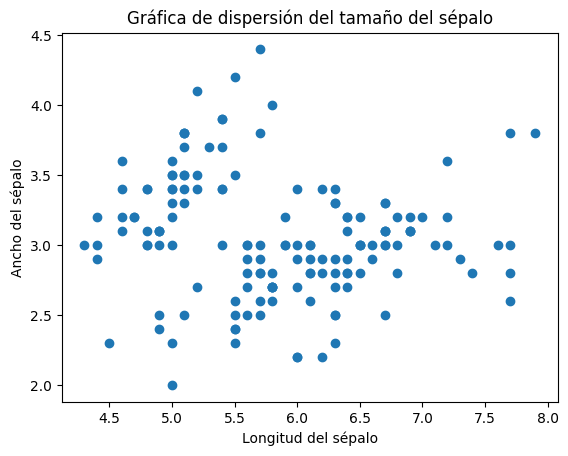

c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


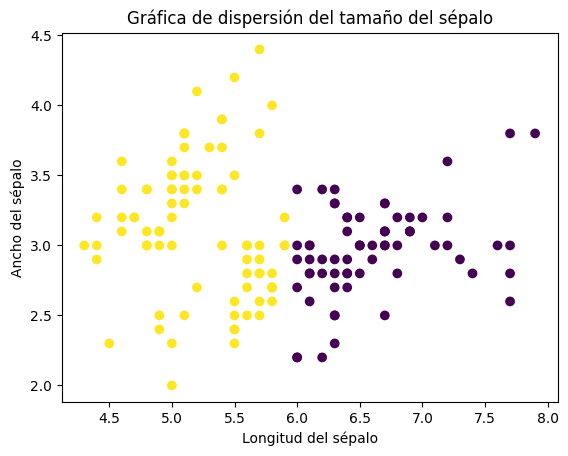

c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


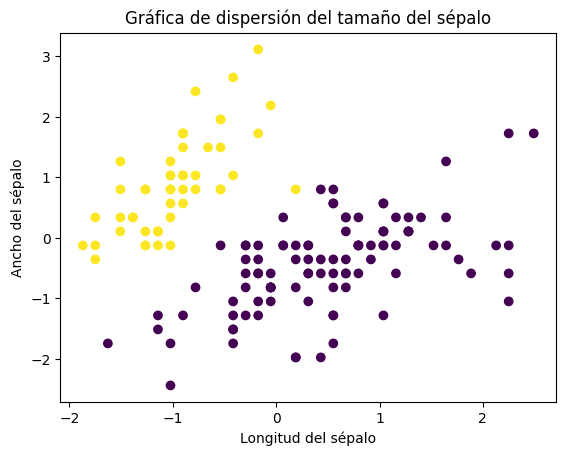

c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

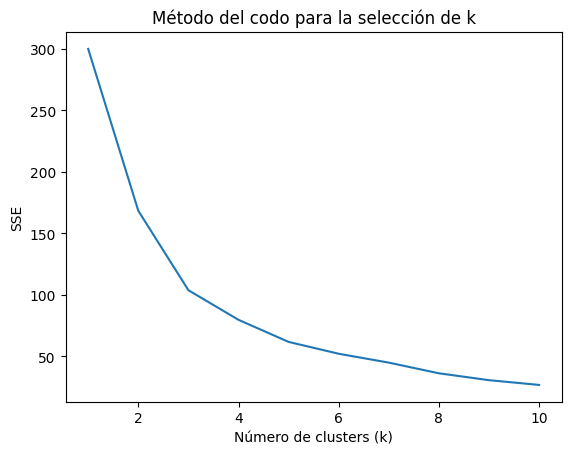

c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


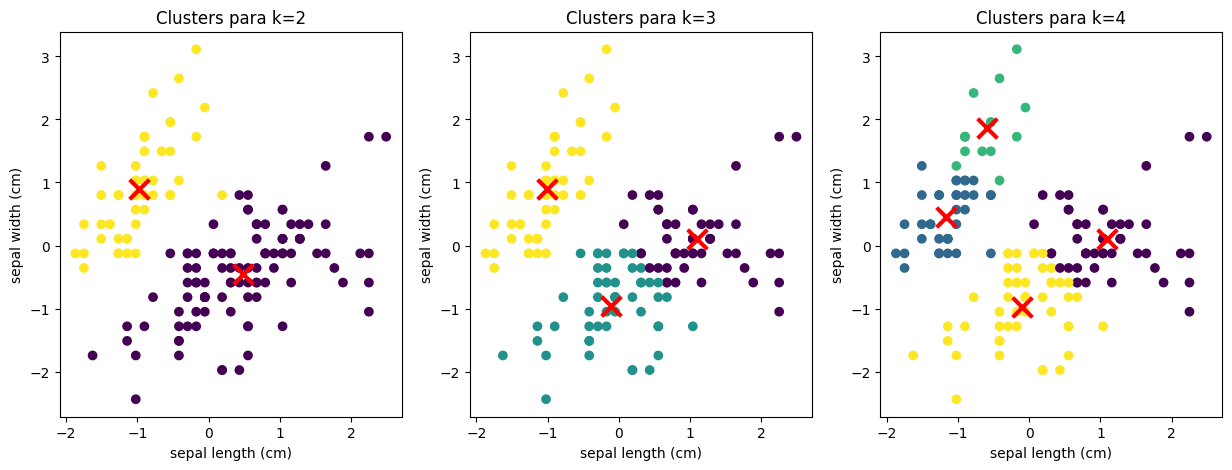

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:--------------------------------------------------------

# cargamos los datos
iris_data = pd.read_csv('iris.csv')

# creamos la gráfica de dispersión
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'])
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()

# Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados. --------------------------------------------------------------------------------------- 

# creamos el objeto KMeans con 2 clusters
kmeans = KMeans(n_clusters=2)

# ajustamos los datos al modelo
kmeans.fit(iris_data[['sepal_length', 'sepal_width']])

# obtenemos las etiquetas de los clusters
labels = kmeans.predict(iris_data[['sepal_length', 'sepal_width']])

# graficamos los resultados
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=labels)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()



# 3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?-----------------------------------------------------------------------------------------------

# creamos un objeto StandardScaler
scaler = StandardScaler()

# estandarizamos los datos
scaled_data = scaler.fit_transform(iris_data[['sepal_length', 'sepal_width']])

# creamos el objeto KMeans con 2 clusters
kmeans = KMeans(n_clusters=2)

# ajustamos los datos estandarizados al modelo
kmeans.fit(scaled_data)

# obtenemos las etiquetas de los clusters
labels = kmeans.predict(scaled_data)

# graficamos los resultados
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()


#4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)------------------------------------------------------------------------------------------------
# creamos una lista para almacenar los valores de SSE para cada valor de k
sse = []

# definimos un rango de valores de k para probar
k_range = range(1, 11)

# iteramos sobre el rango de valores de k
for k in k_range:
    # creamos un objeto KMeans con el número de clusters igual a k
    kmeans = KMeans(n_clusters=k, random_state=42)
    # ajustamos el modelo a los datos estandarizados
    kmeans.fit(scaled_data)
    # añadimos el valor de SSE a la lista
    sse.append(kmeans.inertia_)
    
# graficamos el resultado
plt.plot(k_range, sse)
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo para la selección de k')
plt.show()

#En la gráfica, podemos ver que el SSE disminuye rápidamente para valores pequeños de k, pero a partir de k=3, la tasa de disminución comienza a ser más lenta. Por lo tanto, el punto de codo se encuentra en k=3, lo que indica que el número óptimo de clusters es 3.

#5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.---------------------------------------------------------------------------------
# creamos un objeto KMeans con 2 clusters y ajustamos el modelo a los datos estandarizados
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(scaled_data)

# creamos un objeto KMeans con 3 clusters y ajustamos el modelo a los datos estandarizados
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(scaled_data)

# creamos un objeto KMeans con 4 clusters y ajustamos el modelo a los datos estandarizados
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(scaled_data)

# creamos una figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# graficamos los resultados para k=2
axs[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_2.labels_)
axs[0].scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[0].set_xlabel('sepal length (cm)')
axs[0].set_ylabel('sepal width (cm)')
axs[0].set_title('Clusters para k=2')

# graficamos los resultados para k=3
axs[1].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_3.labels_)
axs[1].scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[1].set_xlabel('sepal length (cm)')
axs[1].set_ylabel('sepal width (cm)')
axs[1].set_title('Clusters para k=3')

# graficamos los resultados para k=4
axs[2].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_4.labels_)
axs[2].scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[2].set_xlabel('sepal length (cm)')
axs[2].set_ylabel('sepal width (cm)')
axs[2].set_title('Clusters para k=4')

plt.show()


